<a href="https://colab.research.google.com/github/jihye-kim11/sp/blob/master/TF_Certificate_Category_2_(%EA%B0%95%EC%9D%98)_%EC%9D%B4%EB%AF%B8%EC%A7%80_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Category 2

Fully Connected Layer (Dense)를 활용한 이미지 분류 (Image Classification)

## 확인

1. GPU 옵션 켜져 있는지 확인할 것!!! (수정 - 노트설정 - 하드웨어설정 (GPU))

## 순서

1. **import**: 필요한 모듈 import
2. **전처리**: 학습에 필요한 데이터 전처리를 수행합니다.
3. **모델링(model)**: 모델을 정의합니다.
4. **컴파일(compile)**: 모델을 생성합니다.
5. **학습 (fit)**: 모델을 학습시킵니다.

## 문제

Create a classifier for the Fashion MNIST dataset

Note that the test will expect it to classify 10 classes and that

the input shape should be the native size of the Fashion MNIST dataset which is 28x28 monochrome.

Do not resize the data. Your input layer should accept

(28,28) as the input shape only.

If you amend this, the tests will fail.

Fashion MNIST 데이터 셋에 대한 분류기 생성
테스트는 10 개의 클래스를 분류 할 것으로 예상하고

입력 모양은 Fashion MNIST 데이터 세트의 기본 크기 여야합니다.28x28 단색.

데이터 크기를 조정하지 마십시오. input_shape는
(28,28)을 입력 모양으로 만 사용합니다.

## import 하기

필요한 모듈을 import 합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

## Load dataset

**tf.keras.datasets** 에는 다양한 샘플 데이터를 제공해줍니다.

[tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

* **boston_housing**: Boston housing price regression dataset.

* **cifar10**: CIFAR10 small images classification dataset.

* **cifar100**: CIFAR100 small images classification dataset.

* **fashion_mnist**: Fashion-MNIST dataset.

* **imdb**: IMDB sentiment classification dataset.

* **mnist**: MNIST handwritten digits dataset.

* **reuters**: Reuters topic classification dataset.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

아래 순서가 헷갈릴 수 있습니다. 순서에 유의해 주세요.

In [3]:
(x_train, y_train), (x_valid, y_valid) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
x_train.shape, x_valid.shape  #6만장의 이미지가 28*28 바이트로 구성

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train.shape, y_valid.shape

((60000,), (10000,))

**이미지 정규화 (Normalization)**

* 모든 이미지 픽셀(pixel)값들을 0~1 사이의 값으로 정규화 해 줍니다.
* x_train, x_valid 에 대해서만 정규화합니다.

정규화(Normalization) 전의 최소값(min), 최대값(max)을 확인합니다.

In [6]:
x_train.min(), x_train.max()

(0, 255)

정규화(Normalization) 합니다.

In [7]:
x_train = x_train / 255.0
x_valid = x_valid / 255.0

정규화 후 최소값/최대값 확인

In [8]:
x_train.min(), x_train.max()

(0.0, 1.0)

## 샘플 데이터 Visualization

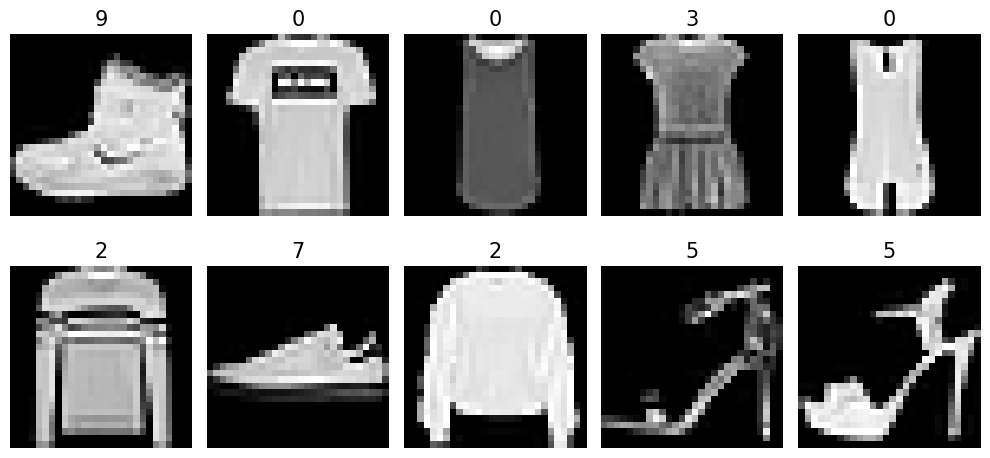

In [9]:
# 시각화
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)

for i in range(10):
    axes[i//5, i%5].imshow(x_train[i], cmap='gray')
    axes[i//5, i%5].set_title(str(y_train[i]), fontsize=15)
    plt.setp( axes[i//5, i%5].get_xticklabels(), visible=False)
    plt.setp( axes[i//5, i%5].get_yticklabels(), visible=False)
    axes[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()

* 0: 티셔츠/탑
* 1: 바지
* 2: 풀오버(스웨터의 일종)
* 3: 드레스
* 4: 코트
* 5: 샌들
* 6: 셔츠
* 7: 스니커즈
* 8: 가방
* 9: 앵클 부츠

## Flatten Layer

**Flatten이란?**

* 고차원을 1D로 변환하여 **Dense Layer에 전달**해 주기 위하여 사용합니다.
* 28 X 28 의 **2D**로 되어 있는 이미지를 784로 **1D로 펼쳐 주는 작업**입니다.

**변환 전**

In [10]:
x_train.shape

(60000, 28, 28)

**Flatten 적용 후**

In [11]:
x = Flatten(input_shape=(28, 28))
print(x(x_train).shape)

(60000, 784)


## 활성함수 (relu, sigmoid, softmax)

In [12]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

### relu

In [13]:
def relu(x):
    return np.maximum(x, 0)

In [14]:
x = np.linspace(-10, 10)
y = relu(x)

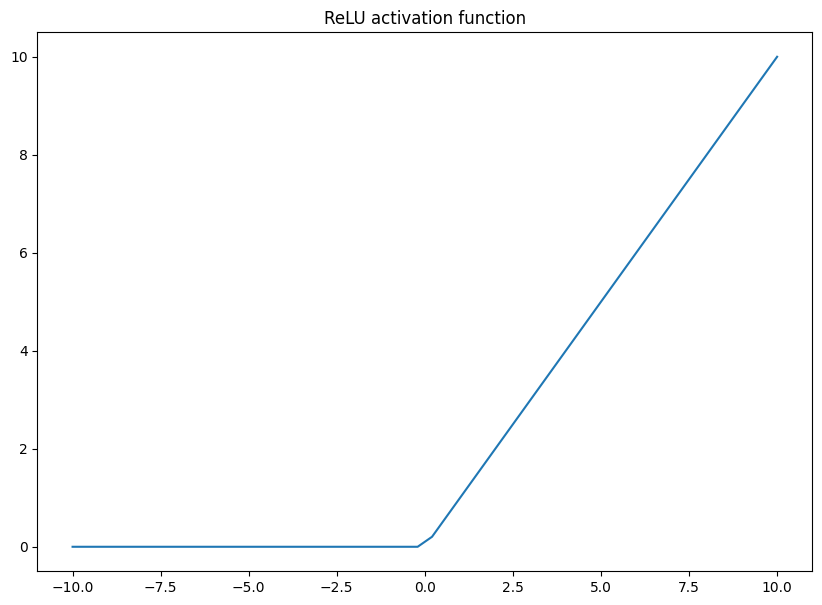

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(x, y)
plt.title('ReLU activation function')
plt.show()

**Dense Layer에 ReLU activation 적용**

In [16]:
Dense(20, activation='relu')

### Sigmoid




$\displaystyle s(z) = \frac{1}{1+e^{-z}}$

$z$ 값을 0과 1사이의 값으로 바꾸는 함수

**Sigmoid 함수 원리**

$\frac{1}{1} = 1$인데, 분모 1에다 0보다 크거나 같은 어떤 수를 더 하면 그 결과는 1 보다 클수 없다.

분모에 더 할 값은 $e^{-z}$, 이 값은 어떤 $z$가 주어져도 0보다 작아 지지 않는다.

$e^{-z}$는 $z$의 값이 크면 클 수록 0에 가까운 작은 수가 되고 $z$값이 작으면 무한대에 가까운 큰 수가 된다

따라서 $z$의 값이 크면 $e^{-z}$의 값이 작아져서 $\frac{1}{1+e^{-z}}$의 값은 1에 가까워 지고 그 반대는 0에 가까워 진다.


In [17]:
def sigmoid(z):
    return  1/(1+np.exp(-z))

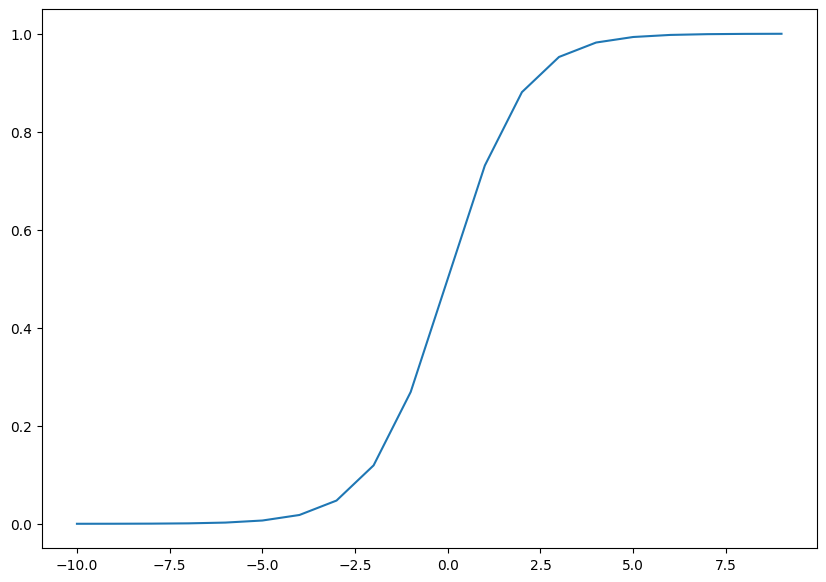

In [18]:
plt.figure(figsize=(10, 7))

x = np.arange(-10, 10)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

### Softmax

뉴런의 출력값에 대하여 class 분류를 위하여 마지막 단계에서 출력값에 대한 정규화를 해주는 함수이다.

사진속 인물이 지금 슬픈 표정인지, 웃는 표정인지, 화난 표정인지 확률적으로 수치화한다고 했을때,

슬픔 (11%), 웃음 (29%), 화남(60%) 화같이 확률적 classification 을 할 때 용이하다.

소프트맥스 함수의 특징은 **확률의 합은 언제나 1.0** 이다.

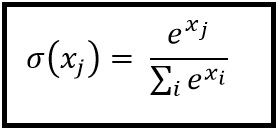

In [19]:
Image('https://i.stack.imgur.com/wxJKQ.jpg')

In [22]:
import numpy as np

a = np.random.uniform(low=0.0, high=10.0, size=3)

def softmax(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

y = softmax(a)
print('Class 별 확률 값 출력')
print('===' * 10)
for i in range(3):
    print('Class {} 의 확률: {:.3f}'.format(i, y[i]))
print('===' * 10)
print('Class 별 확률 값의 합: {:.1f}'.format(y.sum()))

Class 별 확률 값 출력
Class 0 의 확률: 0.003
Class 1 의 확률: 0.788
Class 2 의 확률: 0.209
Class 별 확률 값의 합: 1.0


다중분류의 맨 마지막 출력층 활성함수로는 Dense layer에 'softmax'를 적용합니다.

* 단, Dense 레이어의 unit이 2보다 크거나 같은 경우에만 해당합니다. (만약, 1이라면 'sigmoid'를 활성함수로 설정합니다)

In [23]:
Dense(10, activation='softmax')

## 모델 정의 (Sequential)

이제 Modeling을 할 차례입니다.

`Sequential` 모델 안에서 층을 깊게 쌓아 올려 주면 됩니다.

1. Dense 레이어는 2D 형태의 데이터를 받아들이지 못합니다. Flatten 레이어로 2D -> 1D로 변환해주세요
2. 깊은 출력층과 더 많은 Layer를 쌓습니다.
3. Dense Layer에 `activation='relu'`를 적용합니다.
4. 분류(Classification)의 마지막 층의 출력 숫자는 분류하고자 하는 클래스 갯수와 **같아야** 합니다.


#이진분류 case

##1
sigmoid: x의 값에 따라 0~1의 값을 출력하는 S자형 함수이다
Dense(1, activation='sigmoid')  <- 절대 바꾸면 안되는 코드
loss='binary_crossentropy'

##2
Dense(2, activation='softmax')   <- 절대 바꾸면 안되는 코드
loss='categorical_crossentropy'

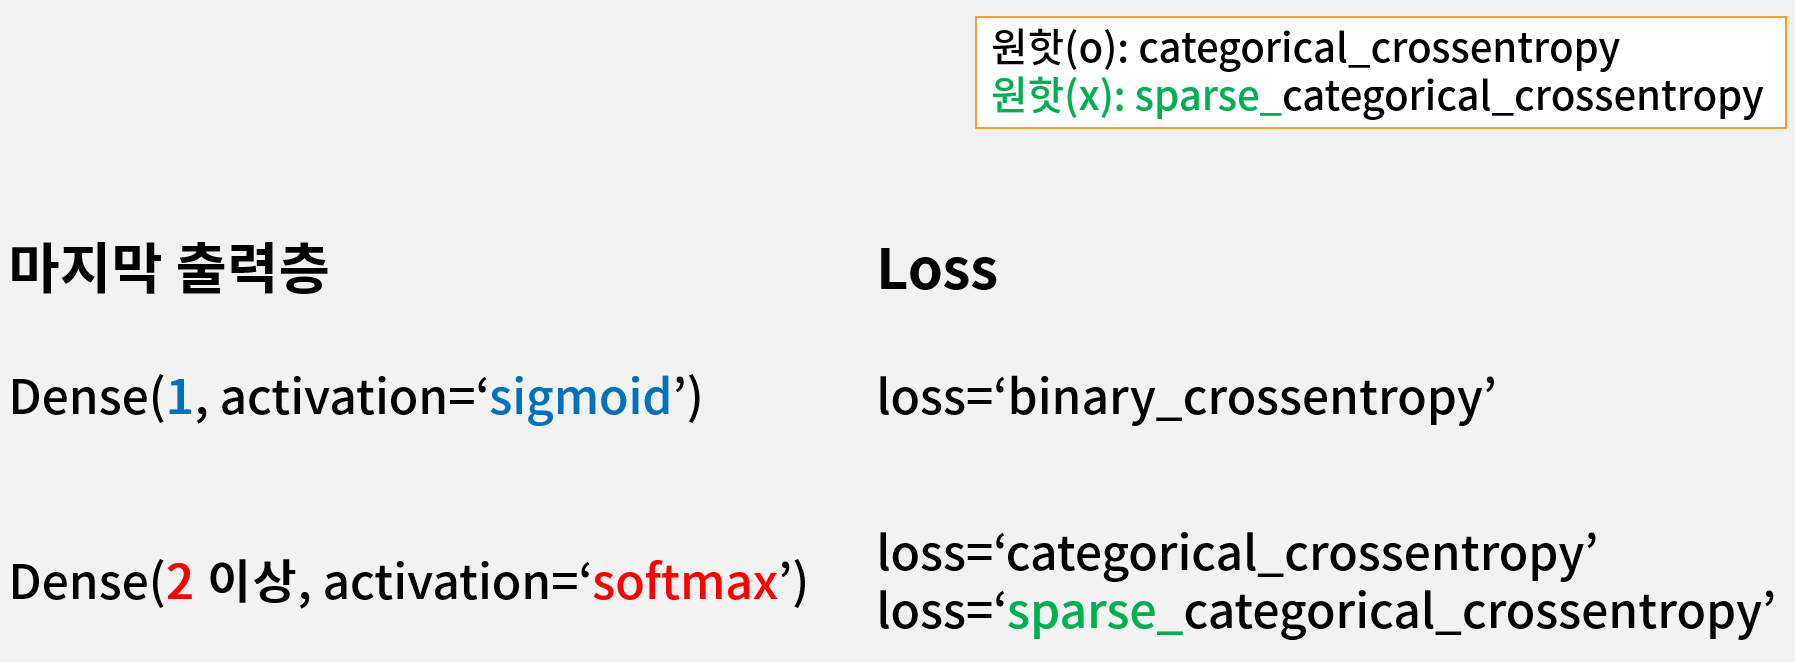

In [24]:
model = Sequential([
    # Flatten으로 shape 펼치기
    Flatten(input_shape=(28, 28)),
    # Dense Layer
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    # Classification을 위한 Softmax
    Dense(10, activation='softmax'), #클래스 10개 분류하는 중이므로
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 1024)              803840    
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                6

## 컴파일 (compile)

1. `optimizer`는 가장 최적화가 잘되는 알고리즘인 'adam'을 사용합니다.
2. `loss`설정
  * 출력층 activation이 `sigmoid` 인 경우: `binary_crossentropy`
  * 출력층 activation이 `softmax` 인 경우:
    * 원핫인코딩(O): `categorical_crossentropy`
    * 원핫인코딩(X): `sparse_categorical_crossentropy`)
3. `metrics`를 'acc' 혹은 'accuracy'로 지정하면, 학습시 정확도를 모니터링 할 수 있습니다.

**원핫인코딩 여부 체크방법**

케이스 1: 원핫인코딩 (X)

In [26]:
y_train[0]

9

케이스 2: 원핫인코딩 (O)

In [ ]:
print(tf.one_hot(y_train[0], 10))

model.compile()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

## ModelCheckpoint: 체크포인트 생성

`val_loss` 기준으로 epoch 마다 최적의 모델을 저장하기 위하여, ModelCheckpoint를 만듭니다.
* `checkpoint_path`는 모델이 저장될 파일 명을 설정합니다.
* `ModelCheckpoint`을 선언하고, 적절한 옵션 값을 지정합니다.

In [ ]:
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

## 학습 (fit)

1. `validation_data`를 반드시 지정합니다.
2. `epochs`을 적절하게 지정합니다.
3. `callbacks`에 바로 위에서 만든 checkpoint를 지정합니다.

In [ ]:
history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    epochs=20,
                    callbacks=[checkpoint],
                   )

## 학습 완료 후 Load Weights (ModelCheckpoint)

학습이 완료된 후에는 반드시 `load_weights`를 해주어야 합니다.

그렇지 않으면, 열심히 ModelCheckpoint를 만든 의미가 없습니다.

In [ ]:
# checkpoint 를 저장한 파일명을 입력합니다.
model.load_weights(checkpoint_path)

## 학습한 후 검증하고 싶다면?

In [ ]:
model.evaluate(x_valid, y_valid)

## 학습 Loss (오차)에 대한 시각화

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['loss'])
plt.plot(np.arange(1, 21), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['acc'])
plt.plot(np.arange(1, 21), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()